
#Connecting libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.core.common import random_state
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier    
from sklearn.linear_model import LogisticRegression   
from sklearn.neighbors import KNeighborsClassifier   

In [2]:
!pip install catboost -q

import catboost as cb

     |████████████████████████████████| 76.6 MB 67 kB/s 


#Uploading datasets

In [3]:
!wget https://github.com/ivtipm/ML/raw/main/datasets/classification/Train.zip
!wget https://github.com/ivtipm/ML/raw/main/datasets/classification/Test.zip
!unzip Train.zip
!unzip Test.zip
!ls -al

--2022-06-06 06:37:16--  https://github.com/ivtipm/ML/raw/main/datasets/classification/Train.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ivtipm/ML/main/datasets/classification/Train.zip [following]
--2022-06-06 06:37:17--  https://raw.githubusercontent.com/ivtipm/ML/main/datasets/classification/Train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8016192 (7.6M) [application/zip]
Saving to: ‘Train.zip’

Train.zip           100%[===================>]   7.64M  --.-KB/s    in 0.09s   

2022-06-06 06:37:17 (87.3 MB/s) - ‘Train.zip’ saved [8016192/8016192]

--2022-06-06 06:37:17--  https:

#Datasets info

In [4]:
train = pd.read_csv('Train.csv')
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]

test = pd.read_csv('Test.csv')
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

In [5]:
train

x01         x02         x03         x04        x05        x06  \
0       69.659807 -102.567490 -209.903964    6.472164   4.313487 -61.312685   
1     -167.101860  -10.358355 -245.384592  -40.677900   0.273391 -42.714440   
2       13.336421  -95.034657  -14.315424  220.731440  -0.768787 -48.763635   
3      -22.264600 -104.296800   76.000002  -41.293515 -10.132445 -22.162121   
4      -48.277153   44.170234  165.491114   72.755204   4.191435  10.865955   
...           ...         ...         ...         ...        ...        ...   
83995  -36.487312  -23.370657 -150.138389  -42.360166   3.085773  -7.556134   
83996  -84.598861   13.849712  502.114658  584.468584   2.674787  22.506230   
83997  128.379542   67.279397  -14.385414 -155.621175  -2.901119 -37.237341   
83998  188.663644   34.278561  301.973677  255.045014   4.567485  11.666102   
83999   15.459030   92.479869  200.503392  -94.451323  -5.680883  71.909939   

              x07         x08         x09         x10  class  
0       -2.332122 -162.011126  157.151007   26.729849    0.0  
1      -88.687790  -31.520900  -49.678909   -6.353039    0.0  
2      -10.678075   64.526753 -105.345817  108.155193    1.0  
3       33.234002  -70.546114   -4.324115  -83.161245    1.0  
4       -7.188119  252.577423   41.923064 -102.622804    1.0  
...           ...         ...         ...         ...    ...  
83995  -23.374632  -70.814810   78.228616  -25.221416    3.0  
83996  161.208963  326.872357  -86.365952  155.452225    3.0  
83997    2.700201 -128.473720  -92.952199   71.040588    2.0  
83998  175.614587  -28.477798  -96.075433  183.614465    1.0  
83999   29.307971   44.867118  190.483445  -27.658809    2.0  

[84000 rows x 11 columns]

In [6]:
test

x01         x02         x03         x04        x05        x06  \
0      -31.818673    3.728530   86.147490  192.576083   7.625600 -72.489411   
1       74.010313   -9.526618  222.432546  324.155456  10.768680 -46.664018   
2      -51.995581   20.264552  -25.143527  -66.544243   3.324763 -39.651063   
3       27.571044  -65.681298   75.108846  164.185199   1.762395   7.699141   
4      191.643377    4.745831  138.263642   -2.606989   1.219546 -55.303741   
...           ...         ...         ...         ...        ...        ...   
35995   69.019243   69.678800  -43.927496 -189.412705  -6.873485 -31.367339   
35996  -56.719397   26.530471 -253.238920  104.530108   5.664701  32.115083   
35997  -12.006466  -67.594048  -57.671303 -246.153987  -8.788019  32.835668   
35998  -73.004201 -158.295355 -249.423123  -28.372124  -1.720927  72.939268   
35999 -124.638808  -14.661764  100.334294 -154.745470 -12.930240  53.960767   

              x07         x08         x09         x10  
0       52.361550   95.370953   45.542273   17.386058  
1      105.291165  161.311013   -1.589251   61.365038  
2       60.760956 -137.088946   18.106320  -57.800167  
3       19.976463   98.064048  -42.046512   11.407697  
4       84.757685  -72.416358  -52.026399   37.512775  
...           ...         ...         ...         ...  
35995  -38.601989 -102.568423   58.869594   63.136282  
35996 -104.254184   42.196204  133.678476  161.542990  
35997  -16.214359 -138.868499  -90.248863 -158.980527  
35998   20.457649 -279.423463   50.368413  -30.839177  
35999   32.128549  -95.692053  107.798074 -117.254300  

[36000 rows x 10 columns]

In [8]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
print('Classes:')
print(train['class'].unique())

Train shape: (84000, 11)
Test shape: (36000, 10)
Classes:
[0. 1. 3. 2.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


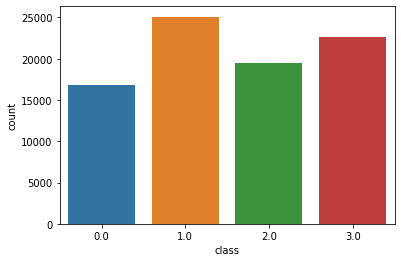

In [9]:
seaborn.countplot(train['class'], label = 'Count')

#Making training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

Y = train['class']
X = train.drop(columns = ['class'])

X = preprocessing.normalize(X)    

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)
X_train_, X_validation, Y_train_, Y_validation = train_test_split(X_train, Y_train, test_size = 0.05, random_state = 42)

print(f"Train: {X_train_.shape[0]}")
print(f"Test: {X_test.shape[0]}")
print(f"Validation: {X_validation.shape[0]}")

Train: 63840
Test: 16800
Validation: 3360


#Pair plot

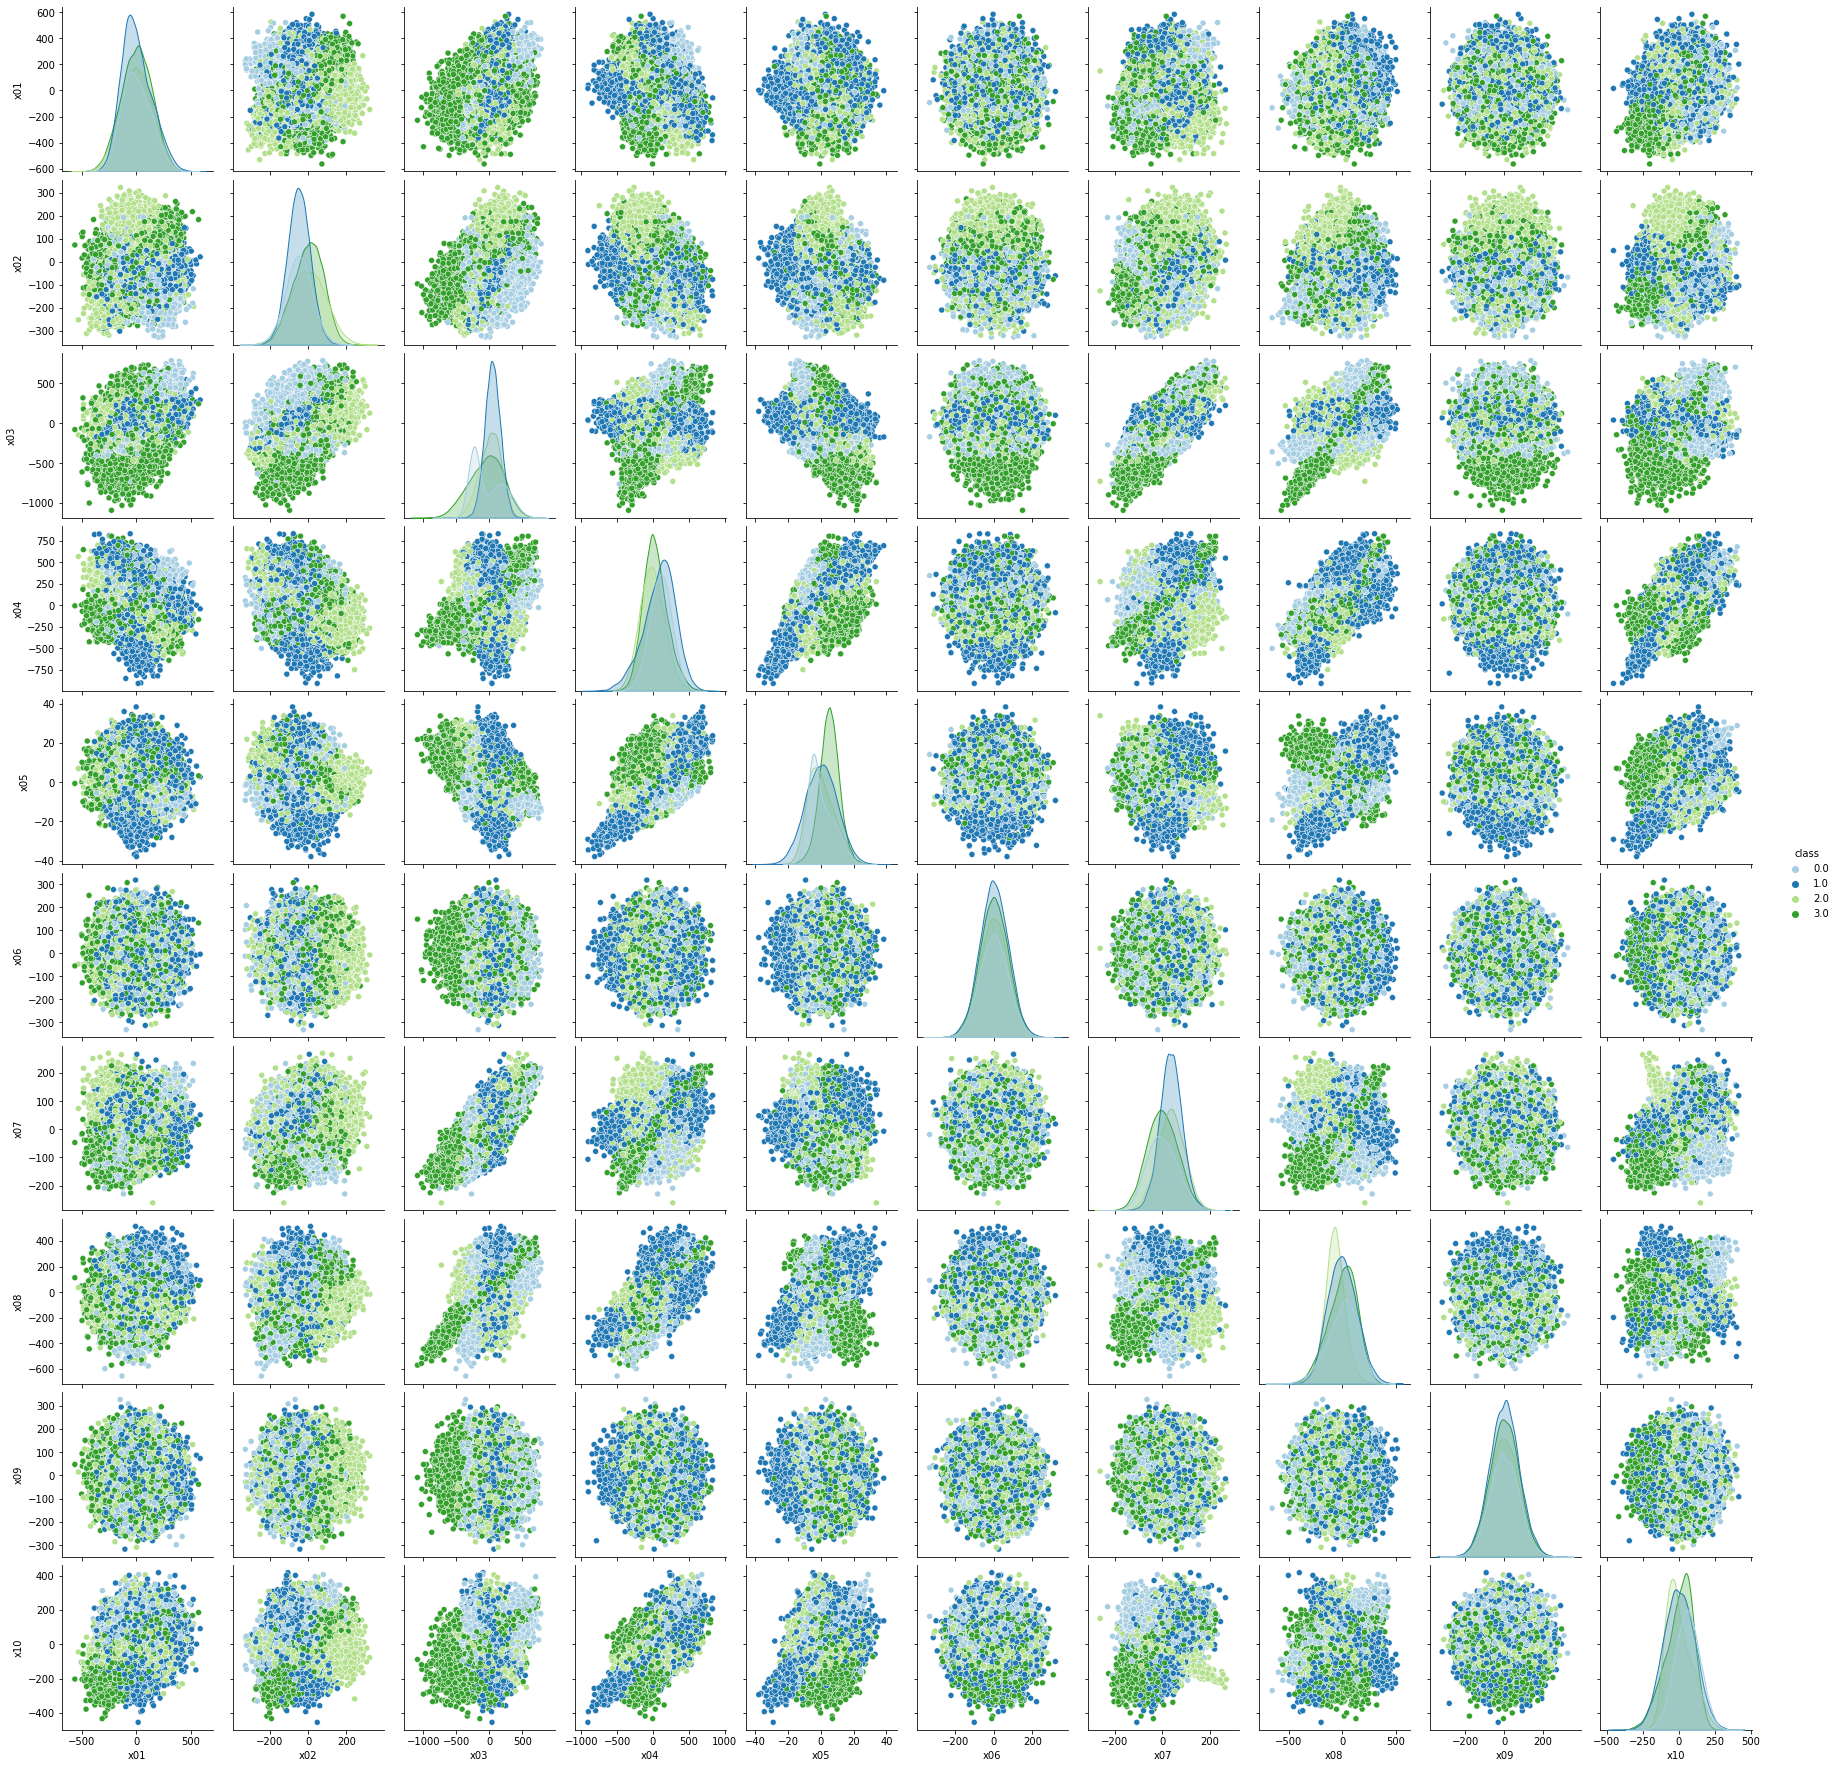

In [11]:
seaborn.pairplot(train, hue = 'class', palette = 'Paired')

#Correlation matrix

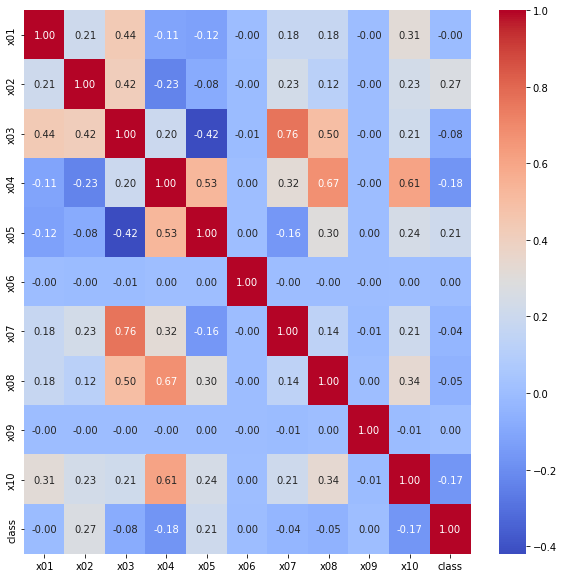

In [12]:
plt.figure(figsize = (10, 10))
seaborn.heatmap(train.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

#K-nearest neighbors

In [17]:
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

print(f'Accuracy score: {metrics.accuracy_score(Y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(Y_test, y_pred))

Accuracy score: 84.26

Classification report:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      3449
         1.0       0.86      0.83      0.84      4968
         2.0       0.84      0.82      0.83      3912
         3.0       0.83      0.89      0.86      4471

    accuracy                           0.84     16800
   macro avg       0.84      0.84      0.84     16800
weighted avg       0.84      0.84      0.84     16800



#Logistic regression

In [18]:
from sklearn import metrics

logit = LogisticRegression()
logit.fit(X_train, Y_train)
Y_pred = logit.predict(X_test)

print(f'Accuracy score: {metrics.accuracy_score(Y_test, Y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(Y_test, Y_pred))

Accuracy score: 50.94

Classification report:
              precision    recall  f1-score   support

         0.0       0.48      0.35      0.40      3449
         1.0       0.47      0.56      0.51      4968
         2.0       0.50      0.42      0.46      3912
         3.0       0.57      0.66      0.61      4471

    accuracy                           0.51     16800
   macro avg       0.51      0.50      0.50     16800
weighted avg       0.51      0.51      0.50     16800



#Decision tree

In [19]:
from sklearn import metrics

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)

print(f'Accuracy score: {metrics.accuracy_score(Y_test, Y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(Y_test, Y_pred))

Accuracy score: 81.92

Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      3449
         1.0       0.82      0.83      0.83      4968
         2.0       0.80      0.79      0.80      3912
         3.0       0.83      0.84      0.84      4471

    accuracy                           0.82     16800
   macro avg       0.82      0.82      0.82     16800
weighted avg       0.82      0.82      0.82     16800



[Text(0.3262171948037508, 0.9883720930232558, 'X[2] <= -0.716\ngini = 0.744\nsamples = 67200\nvalue = [13369, 20123, 15560, 18148]'),
 Text(0.08275447983478162, 0.9651162790697675, 'X[9] <= -0.548\ngini = 0.672\nsamples = 15613\nvalue = [5802, 951, 2679, 6181]'),
 Text(0.027601138987687377, 0.9418604651162791, 'X[4] <= -0.093\ngini = 0.42\nsamples = 4833\nvalue = [892, 317, 68, 3556]'),
 Text(0.014052792248461435, 0.9186046511627907, 'X[6] <= -1.337\ngini = 0.62\nsamples = 1628\nvalue = [786, 251, 21, 570]'),
 Text(0.007354079880894351, 0.8953488372093024, 'X[9] <= -0.889\ngini = 0.431\nsamples = 743\nvalue = [183, 23, 8, 529]'),
 Text(0.003989854908802176, 0.872093023255814, 'X[4] <= -1.014\ngini = 0.326\nsamples = 573\nvalue = [86, 23, 2, 462]'),
 Text(0.0011682076134045258, 0.8488372093023255, 'X[7] <= -0.626\ngini = 0.628\nsamples = 93\nvalue = [35, 15, 1, 42]'),
 Text(0.0006230440604824138, 0.8255813953488372, 'X[9] <= -2.029\ngini = 0.513\nsamples = 50\nvalue = [32, 13, 0, 5]'),


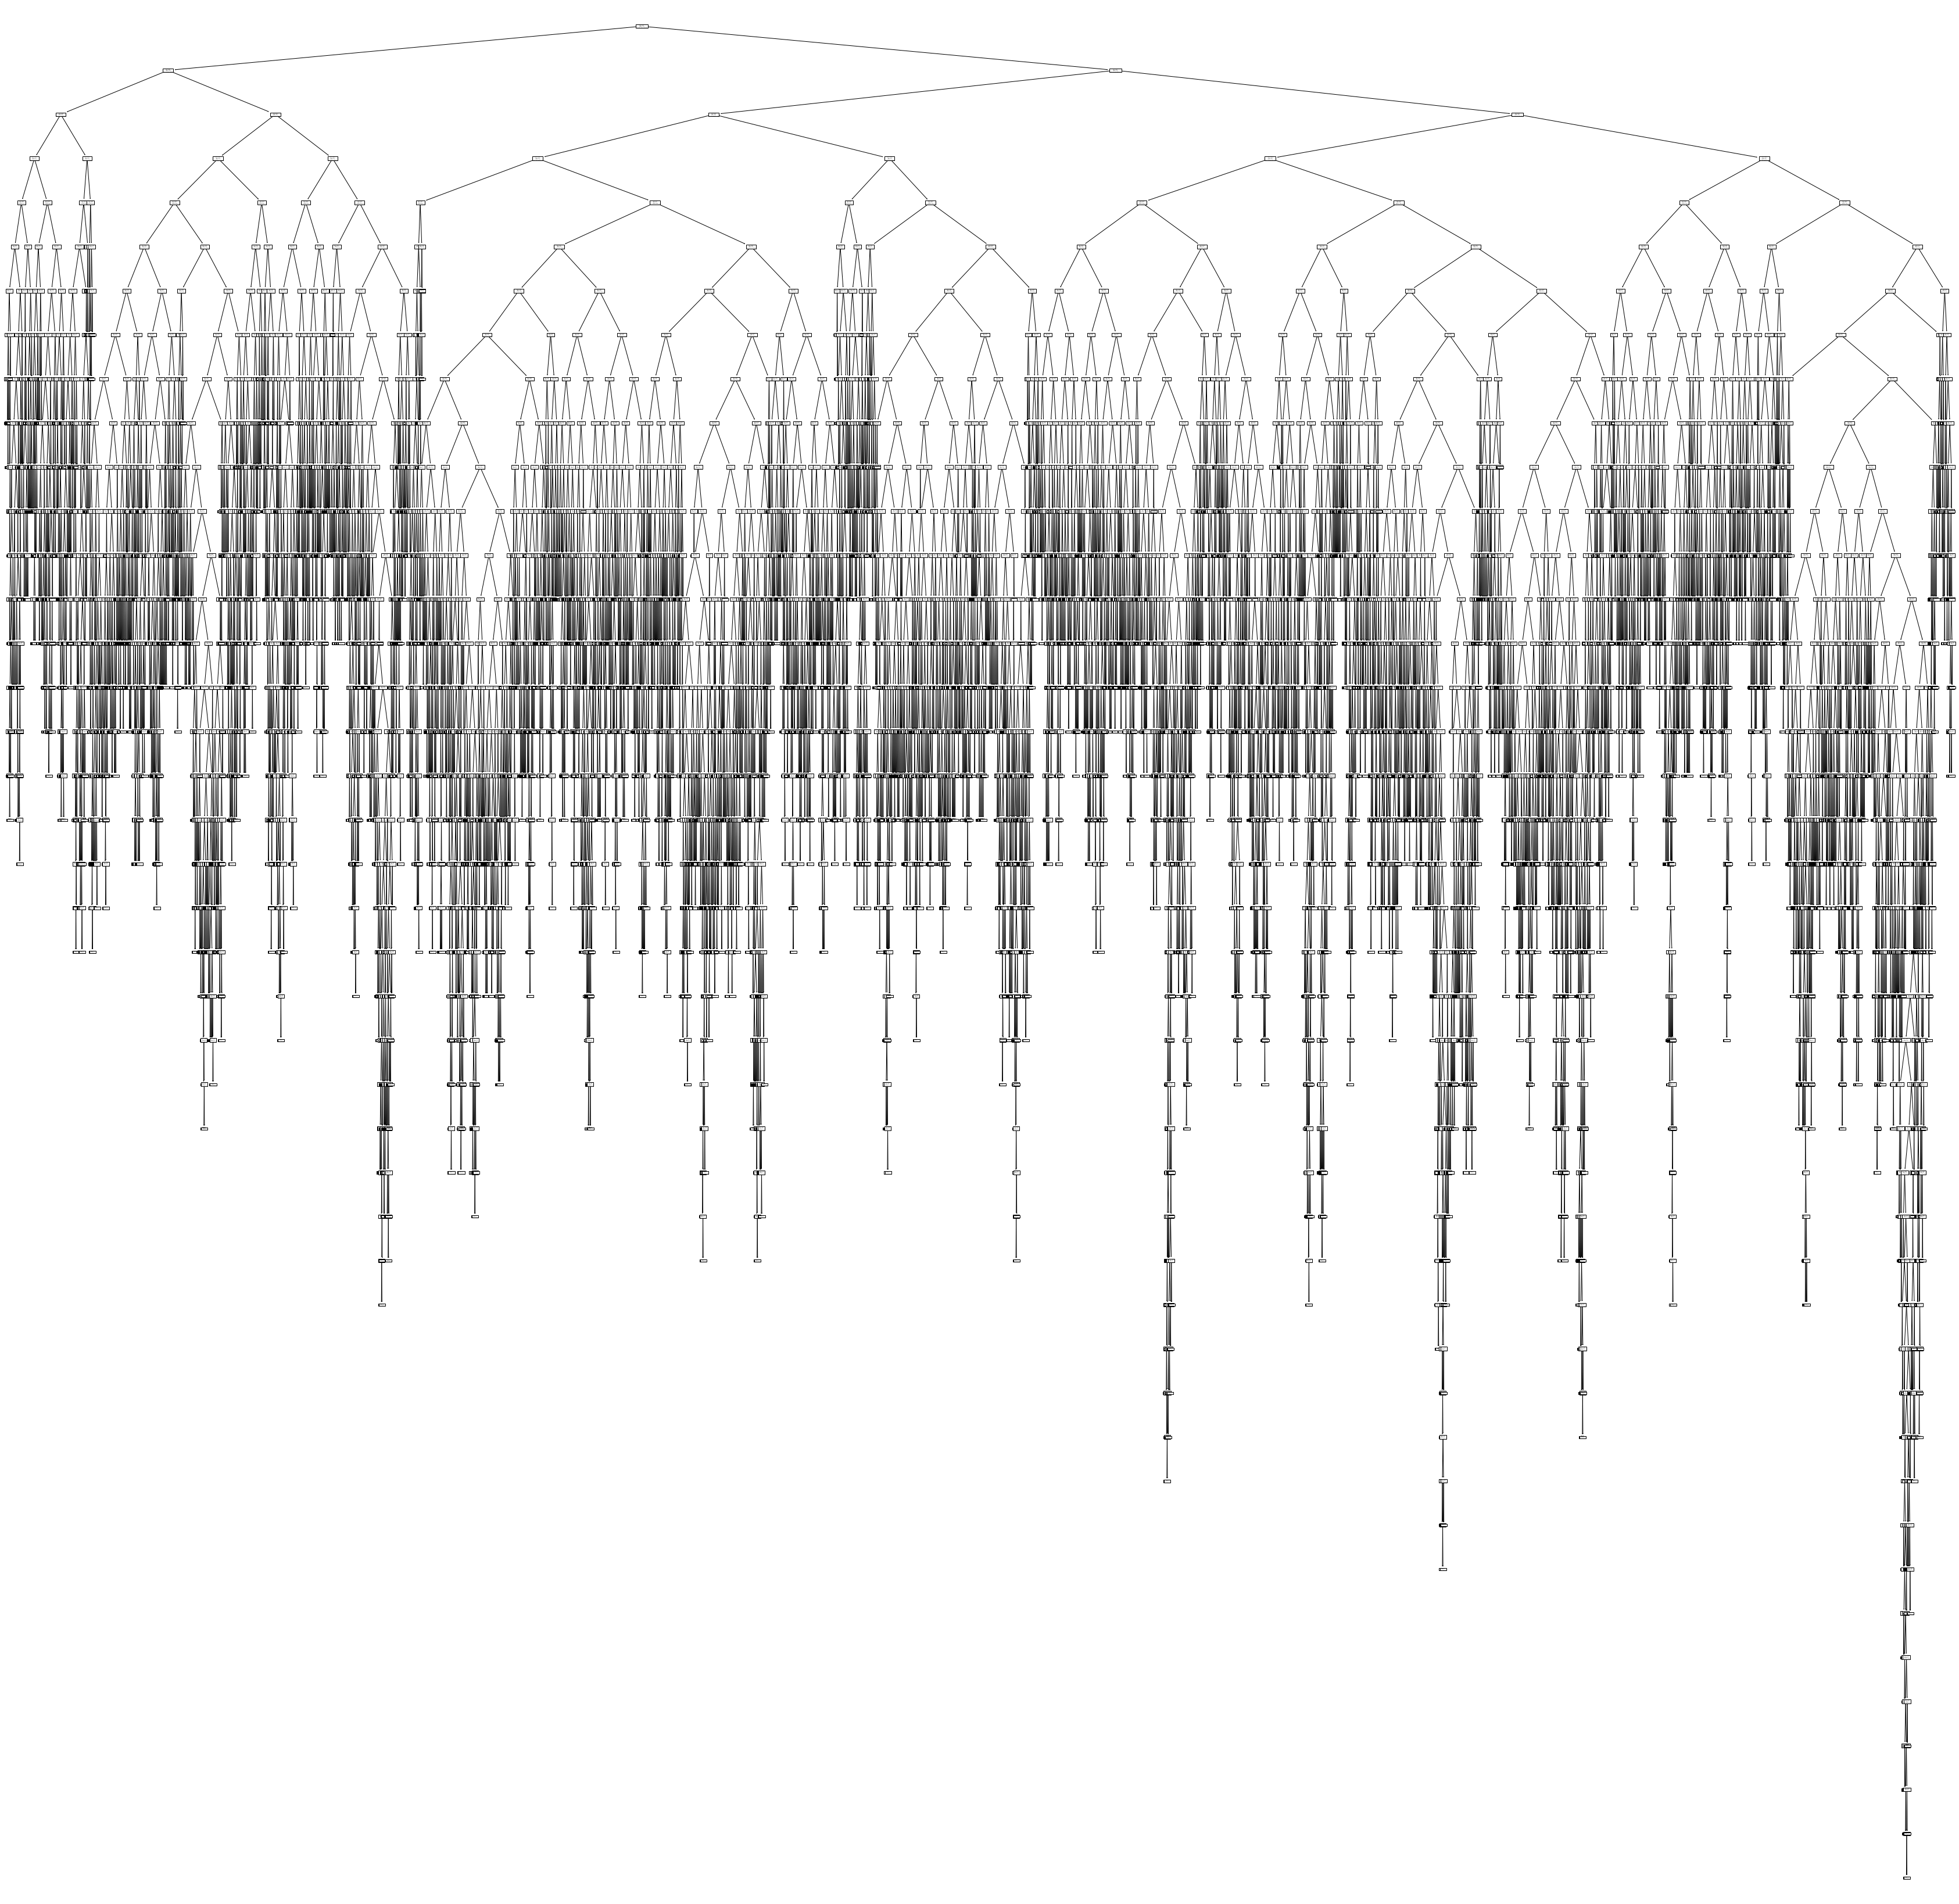

In [ ]:
plt.figure(figsize = (60, 60))
plot_tree(tree)

#Random forest

In [20]:
from sklearn import metrics

forest = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 42, n_jobs = -1)
forest.fit(X_train, Y_train)

Y_pred = forest.predict(X_test)

print(f'Accuracy score: {metrics.accuracy_score(Y_test, Y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(Y_test, Y_pred, digits = 4))

Accuracy score: 89.27

Classification report:
              precision    recall  f1-score   support

         0.0     0.9004    0.8779    0.8890      3449
         1.0     0.8958    0.8931    0.8945      4968
         2.0     0.8714    0.8855    0.8784      3912
         3.0     0.9022    0.9099    0.9060      4471

    accuracy                         0.8927     16800
   macro avg     0.8925    0.8916    0.8920     16800
weighted avg     0.8928    0.8927    0.8927     16800



###Hyperparameters grid search

In [21]:
from sklearn import metrics

parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1, 4, 8], 'criterion': ['gini', 'entropy', 'log_loss']}

gs_forest = GridSearchCV(estimator = forest, param_grid = parameters, n_jobs = -1, verbose = 4)
gs_forest.fit(X_train, Y_train)

print()
print(f'Best parameters: {gs_forest.best_params_}')
forest.set_params(**gs_forest.best_params_)

Y_pred = forest.predict(X_test)

print()
print(f'Accuracy score: {metrics.accuracy_score(Y_test, Y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(Y_test, Y_pred, digits = 4))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935, i


Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}

Accuracy score: 89.27

Classification report:
              precision    recall  f1-score   support

         0.0     0.9004    0.8779    0.8890      3449
         1.0     0.8958    0.8931    0.8945      4968
         2.0     0.8714    0.8855    0.8784      3912
         3.0     0.9022    0.9099    0.9060      4471

    accuracy                         0.8927     16800
   macro avg     0.8925    0.8916    0.8920     16800
weighted avg     0.8928    0.8927    0.8927     16800



#Gradient tree boosting

In [22]:
from sklearn import metrics

parameters = {'depth': [2, 6], 'learning_rate': [0.01, 0.1], 'iterations': [100, 200], 'l2_leaf_reg': [3, 10]}
cat = cb.CatBoostClassifier(loss_function = 'MultiClass', eval_metric = 'Accuracy', random_seed = 42, od_type = 'Iter', od_wait = 5)
grid_search_result = cat.grid_search(parameters, cv = 3, X = X_train, y = Y_train)
cat.get_all_params()

Y_pred = cat.predict(X_test)

print()
print(f'Accuracy score: {metrics.accuracy_score(Y_test, Y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(Y_test, Y_pred, digits = 4))

0:	learn: 0.4143601	test: 0.4162202	best: 0.4162202 (0)	total: 72.8ms	remaining: 7.2s
1:	learn: 0.4164621	test: 0.4185268	best: 0.4185268 (1)	total: 97.8ms	remaining: 4.79s
2:	learn: 0.4273438	test: 0.4225446	best: 0.4225446 (2)	total: 136ms	remaining: 4.39s
3:	learn: 0.4263393	test: 0.4216518	best: 0.4225446 (2)	total: 160ms	remaining: 3.83s
4:	learn: 0.5277158	test: 0.5360119	best: 0.5360119 (4)	total: 182ms	remaining: 3.46s
5:	learn: 0.5292039	test: 0.5387649	best: 0.5387649 (5)	total: 205ms	remaining: 3.21s
6:	learn: 0.5294829	test: 0.5388393	best: 0.5388393 (6)	total: 227ms	remaining: 3.01s
7:	learn: 0.5281436	test: 0.5381696	best: 0.5388393 (6)	total: 249ms	remaining: 2.86s
8:	learn: 0.5282738	test: 0.5384673	best: 0.5388393 (6)	total: 271ms	remaining: 2.74s
9:	learn: 0.5269159	test: 0.5386161	best: 0.5388393 (6)	total: 297ms	remaining: 2.67s
10:	learn: 0.5263393	test: 0.5375000	best: 0.5388393 (6)	total: 319ms	remaining: 2.58s
11:	learn: 0.5258185	test: 0.5394345	best: 0.5394345

#Multilayer perceptron

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from tensorflow.keras.utils import to_categorical

Y_train_categorical = to_categorical(Y_train_)
Y_test_categorical  = to_categorical(Y_test)
Y_validation_categorical  = to_categorical(Y_validation)

perceptron = Sequential()
perceptron.add(Dense(1024, input_dim = X_train.shape[1], activation = 'relu'))
perceptron.add(Dense(512, activation = 'relu'))
perceptron.add(Dense(64, activation = 'relu'))
perceptron.add(Dense(Y_train_categorical.shape[1], activation = 'sigmoid'))
perceptron.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

perceptron.summary()

perceptron.fit(X_train_, Y_train_categorical, validation_data = (X_validation, Y_validation_categorical), epochs = 50, batch_size = X_train.shape[0])

_, accuracy = perceptron.evaluate(X_test, Y_test_categorical)  

print()
print(f'Accuracy: {accuracy * 100:.2f}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              11264     
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 569,156
Trainable params: 569,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 1.3831 - accuracy: 0.2654 - val_loss: 1.3467 - val_accuracy: 0.4685
Epoch 2/50
1/1 [===========================

#Creating predictions file

In [ ]:
test_normalized = preprocessing.normalize(test)
prediction = np.argmax(perceptron.predict(test_normalized), axis = 1)

submission = pd.DataFrame({'class': prediction})
submission.to_csv('my_submission.csv', index = True, index_label = 'id', header = 'class', float_format = '%d')

my_submission = pd.read_csv('my_submission.csv')
my_submission

id  class
0          0      3
1          1      3
2          2      2
3          3      1
4          4      1
...      ...    ...
35995  35995      2
35996  35996      0
35997  35997      1
35998  35998      0
35999  35999      1

[36000 rows x 2 columns]

#Results

* Accuracy of K-nearest neighbors method is 86.55
* Accuracy of decision tree is 51.80
* Accuracy of logistic regression is 84.14

* Accuracy of MLP with hyperparameters `epochs = 5` and layers `500, 100, 10` is 56.02
* Accuracy of MLP with hyperparameters `epochs = 10` and layers `500, 100, 10` is 63.90
* Accuracy of MLP with hyperparameters `epochs = 20` and layers `500, 100, 10` is 71.36
* Accuracy of MLP with hyperparameters `epochs = 50` and layers `500, 100, 10` is 81.78
* Accuracy of MLP with hyperparameters `epochs = 5` and layers `1000, 200, 10` is 62.57
* Accuracy of MLP with hyperparameters `epochs = 10` and layers `1000, 200, 10` is 69.46
* Accuracy of MLP with hyperparameters `epochs = 20` and layers `1000, 200, 10` is 76.30
* Accuracy of MLP with hyperparameters `epochs = 50` and layers `1000, 200, 10` is 85.83
* Accuracy of MLP with hyperparameters `epochs = 5` and layers `2000, 1000, 10` is 69.53
* Accuracy of MLP with hyperparameters `epochs = 10` and layers `2000, 1000, 10` is 75.83
* Accuracy of MLP with hyperparameters `epochs = 20` and layers `2000, 1000, 10` is 82.98
* Accuracy of MLP with hyperparameters `epochs = 50` and layers `2000, 1000, 10` is 88.72
* Accuracy of MLP with hyperparameters `epochs = 50` and layers `512, 256, 32, 10` is 78.32
* Accuracy of MLP with hyperparameters `epochs = 50` and layers `1024, 512, 64, 10` is 84.62